In [127]:
from nltk import edit_distance
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt

## 대소문자 다르게 인식, 
## insertion, deletion, substitution 각 하나에 1씩 추가 됨(물론 minimum distance)

from nltk import edit_distance

example_word = 'abc'
target_words = ['abc', 'abcd', 'a bcd', 'lsh', 'lsha']
for w in target_words:
    print("edit distance of <{}>: {}".format(w, edit_distance("abc", w)))

edit distance of <abc>: 0
edit distance of <abcd>: 1
edit distance of <a bcd>: 2
edit distance of <lsh>: 3
edit distance of <lsha>: 4


30000

In [125]:
## 그렇다면 graph에 대한 edit-distance는 어떻게 계산하나??
## or tree edit distance ??
import networkx as nx 

g1 = nx.complete_graph(["n{}".format(i) for i in range(0, 5)])
g2 = nx.complete_graph(["n{}".format(i) for i in range(0, 5)])

for i in range(0, 3):
    r_n = np.random.choice(g2.nodes())
    print("node removed: {}".format(r_n))
    print("edge removed: {}".format([e for e in g2.edges() if r_n in e]))
    g2.remove_node(r_n)
    print(nx.similarity.graph_edit_distance(g1, g2))
    print("="*50)
    




node removed: n2
edge removed: [('n0', 'n2'), ('n1', 'n2'), ('n2', 'n3'), ('n2', 'n4')]
5.0
node removed: n0
edge removed: [('n0', 'n1'), ('n0', 'n3'), ('n0', 'n4')]
9.0
node removed: n3
edge removed: [('n1', 'n3'), ('n3', 'n4')]
12.0


In [43]:
import time
for s in range(10, 20):
    start_time = time.time()
    g1 = nx.complete_graph(s)
    g2 = nx.complete_graph(s)
    g2.remove_node(np.random.choice(g2.nodes()))
    print(time.time() - start_time)
    print(nx.graph_edit_distance(g1, g2))

0.00026106834411621094 10.0
0.00029778480529785156 11.0
0.00034308433532714844 12.0
0.0003490447998046875 13.0
0.00037789344787597656 14.0
0.0004239082336425781 15.0
0.00046896934509277344 16.0
0.0006198883056640625 17.0
0.0005369186401367188 18.0
0.0005767345428466797 19.0


In [48]:
g1 = nx.complete_graph(30)
g2 = nx.complete_graph(10)
start_time = time.time()
g2.remove_nodes_from(np.random.choice(g2.nodes(), 10))
print(nx.graph_edit_distance(g1, g2))
print(time.time() - start_time)

234.0
19.54055118560791


In [52]:
g1 = nx.complete_graph(30)
g2 = nx.complete_graph(30)
start_time = time.time()
g1.remove_nodes_from(np.random.choice(g2.nodes(), 20))
g2.remove_nodes_from(np.random.choice(g2.nodes(), 20))
print(nx.graph_edit_distance(g1, g2))
print(time.time() - start_time)

15.0
0.24143409729003906


In [70]:
g1 = nx.complete_graph(5)
g2 = nx.complete_graph(5)
start_time = time.time()
g2.remove_nodes_from(np.random.choice(g2.nodes(), 4, replace=False))
print(nx.graph_edit_distance(g1, g2))
print(time.time() - start_time)

14.0
0.00849604606628418


In [62]:
G1 = nx.cycle_graph(6)
G2 = nx.wheel_graph(7)
for i, v in enumerate(nx.optimize_graph_edit_distance(G1, G2)):
    print(i, v)
    minv = v
print(minv)


0 7.0
7.0


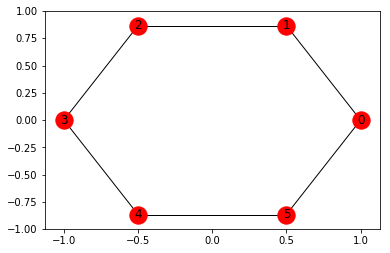

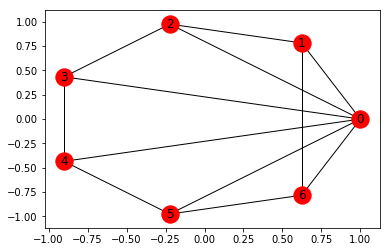

In [68]:
nx.draw_networkx(G1, pos=nx.shell_layout(G1))
plt.figure()
nx.draw_networkx(G2, pos=nx.shell_layout(G2))

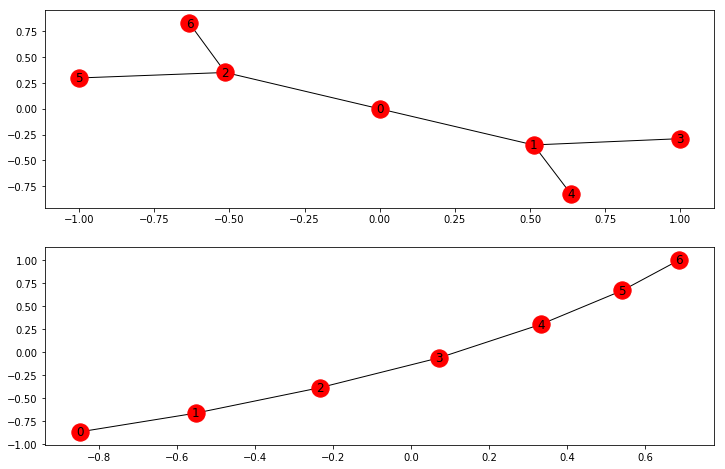

edit distance: 4.0
1.444833755493164


In [153]:
f, axes = plt.subplots(2, 1)
f.set_size_inches(12, 8)
g1 = nx.balanced_tree(2, 2)
g2 = nx.balanced_tree(1, 6)

nx.draw_networkx(g1, ax=axes[0]), nx.draw_networkx(g2, ax=axes[1])
plt.savefig('../../assets/images/markdown_img/180823_bt_edit.svg')
plt.show()

start_time = time.time()
print("edit distance: {}".format(nx.graph_edit_distance(g1, g2)))
print(time.time() - start_time)

In [165]:

for i, v in enumerate(nx.optimize_graph_edit_distance(g1, g2)):
    print("{}, edit distancne: {: >4.1f}".format(i, v))

0, edit distancne: 10.0
1, edit distancne:  8.0
2, edit distancne:  6.0
3, edit distancne:  4.0


In [146]:
#print(nx.graph_edit_distance(g1, g2))
#print(nx.graph_edit_distance(g1, g2))
start_time = time.time()
print(start_time)
min_v = 0
for v in nx.optimize_graph_edit_distance(g1, g2):
    min_v = v
    print(v, time.time()-start_time)
print("="*20)
print(v, time.time()-start_time)

1534989575.8919191
10.0 0.009935855865478516
8.0 0.03700590133666992
6.0 0.10470771789550781
4.0 0.12258195877075195
4.0 1.5502216815948486
